# CNN (Convolutional Neural Network)

In [51]:
from IPython.display import Image
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Preprocessing

In [52]:
# collect MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [53]:
# sample to show gray scale values
print(x_train[0][4])
print(x_train[0][5])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]


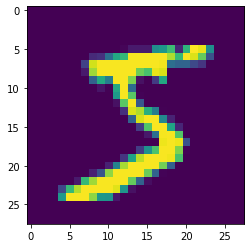

In [54]:
# Visual check
import matplotlib.pyplot as plt
plt.imshow(x_train[0]) # , cmap='Greys'
plt.show()

In [55]:
# sample to show labels for first train data to 10th train data
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [56]:
print("test data has " + str(x_test.shape[0]) + " samples")
print("every test data is " + str(x_test.shape[1]) 
      + " * " + str(x_test.shape[2]) + " image")

test data has 10000 samples
every test data is 28 * 28 image


In [57]:
x_test.shape

(10000, 28, 28)

In [58]:
x_train.shape

(60000, 28, 28)

In [59]:
# reshape data
import numpy as np
x_train = np.reshape(x_train, (60000,28,28,1))
x_test = np.reshape(x_test, (10000,28,28,1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [60]:
# normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [61]:
# change label to one hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [62]:
y_train.shape

(60000, 10)

In [63]:
y_test.shape

(10000, 10)

### Build CNN Model

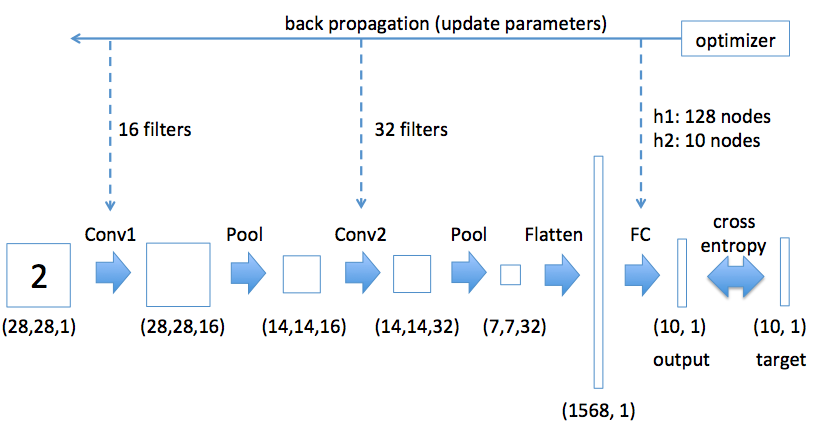

In [64]:
Image("./images/cnn.png", width=600, height=200)

In [65]:
# model = Sequential()
# model.add(Conv2D(16, kernel_size=(5, 5),
#                  activation='relu',
#                  input_shape=(28,28,1),padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(5, 5), activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

model = Sequential([Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1),padding='same'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Conv2D(32, kernel_size=(5, 5), activation='relu',padding='same'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(num_classes, activation='softmax')
                    ])

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               200832    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [67]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [68]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=False),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)]

In [69]:
history=model.fit(x_train, y_train, batch_size=500, epochs=10, verbose=1, validation_split = 0.1, callbacks=callbacks)

Epoch 1/10
108/108 [==============================] - 20s 180ms/step - loss: 0.9480 - accuracy: 0.7375 - val_loss: 0.1253 - val_accuracy: 0.9653
Epoch 2/10
108/108 [==============================] - 20s 182ms/step - loss: 0.1273 - accuracy: 0.9618 - val_loss: 0.0760 - val_accuracy: 0.9778
Epoch 3/10
108/108 [==============================] - 19s 176ms/step - loss: 0.0764 - accuracy: 0.9767 - val_loss: 0.0653 - val_accuracy: 0.9808
Epoch 4/10
108/108 [==============================] - 20s 183ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 0.0520 - val_accuracy: 0.9872
Epoch 5/10
108/108 [==============================] - 21s 198ms/step - loss: 0.0477 - accuracy: 0.9847 - val_loss: 0.0474 - val_accuracy: 0.9870
Epoch 6/10
108/108 [==============================] - 19s 177ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0480 - val_accuracy: 0.9877
Epoch 7/10
108/108 [==============================] - 19s 179ms/step - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0410 - val_ac

In [70]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.036410119384527206
Test accuracy: 0.988099992275238


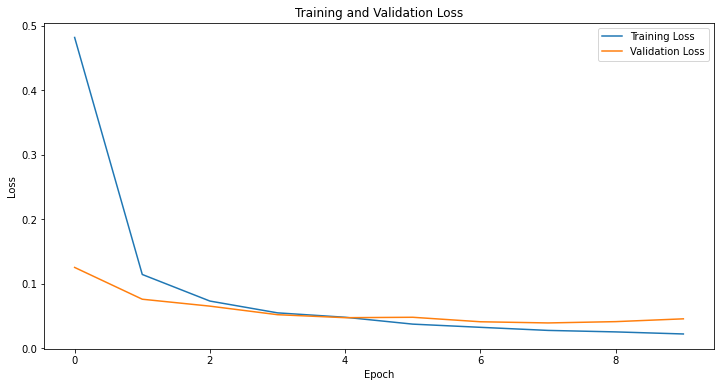

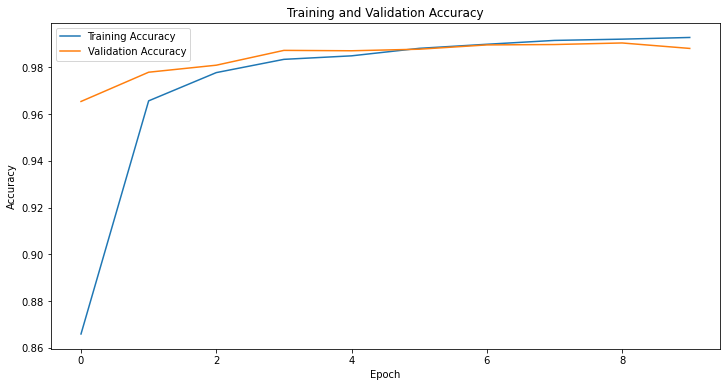

In [71]:
# Visualize the training loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

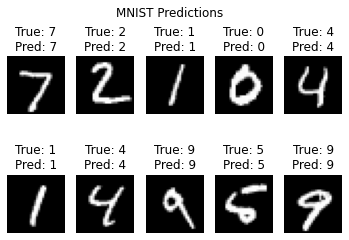

In [72]:
# Visualize some predictions
predictions = model.predict(x_test)
num_samples = 10
for i in range(num_samples):
    plt.subplot(2, num_samples/2, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('True: {}\nPred: {}'.format(np.argmax(y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.suptitle('MNIST Predictions')
plt.show()

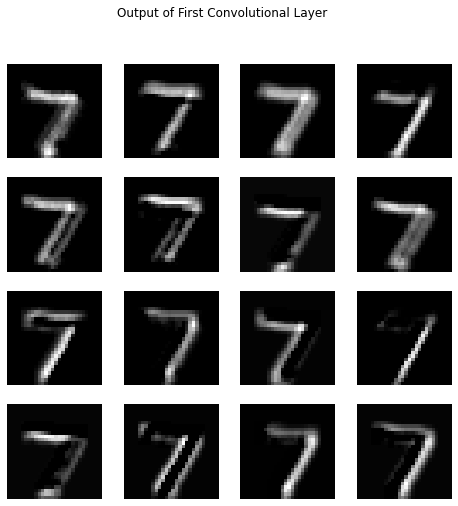

In [74]:
# Create an intermediate model up to the first convolutional layer
intermediate_model = Model(inputs=model.inputs, outputs=model.layers[0].output)

# Get the output of the first convolutional layer for a sample image
sample_image = x_test[0]
conv1_output = intermediate_model.predict(np.array([sample_image]))

# Visualize the output of the first convolutional layer
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(conv1_output[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Output of First Convolutional Layer')
plt.show()

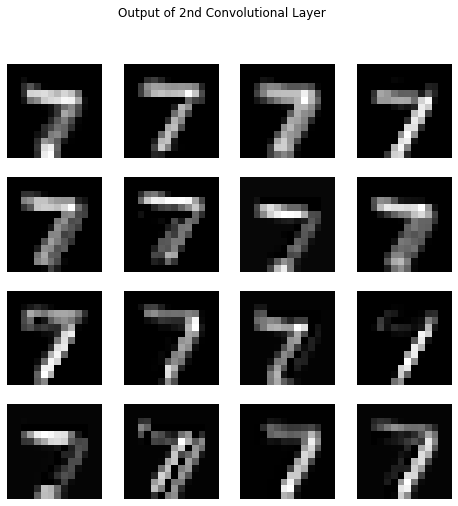

In [83]:
# Create an intermediate model up to the first convolutional layer
intermediate_model = Model(inputs=model.inputs, outputs=model.layers[1].output)

# Get the output of the first convolutional layer for a sample image
sample_image = x_test[0]
conv1_output = intermediate_model.predict(np.array([sample_image]))

# Visualize the output of the first convolutional layer
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(conv1_output[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Output of 2nd Convolutional Layer')
plt.show()